<a href="https://colab.research.google.com/github/sumunoh/study_assemble/blob/main/dl_recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[활성화 함수] 
https://bbangko.tistory.com/5

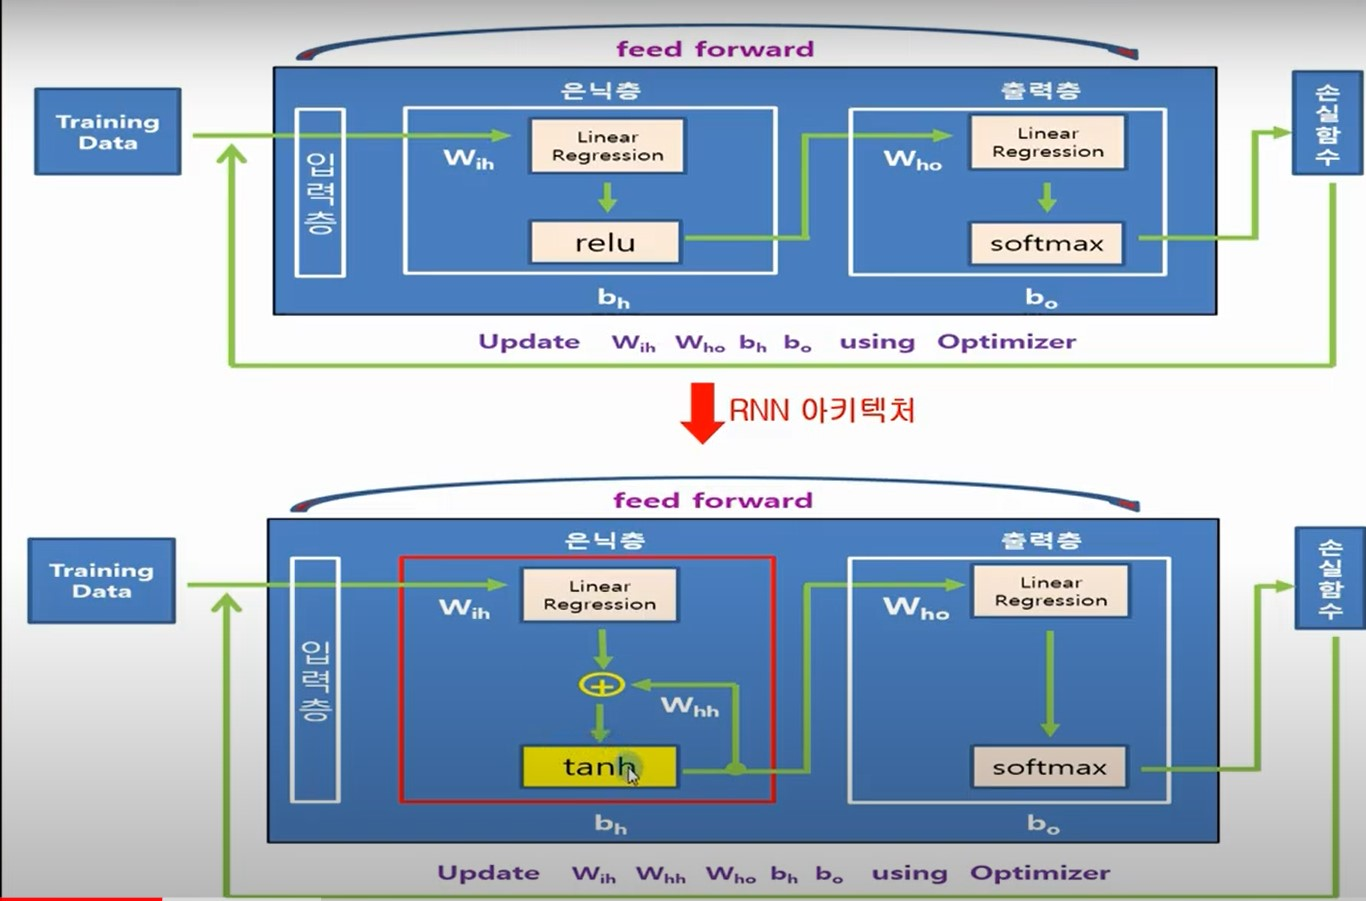

In [8]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/dl/rnn1.jpg')

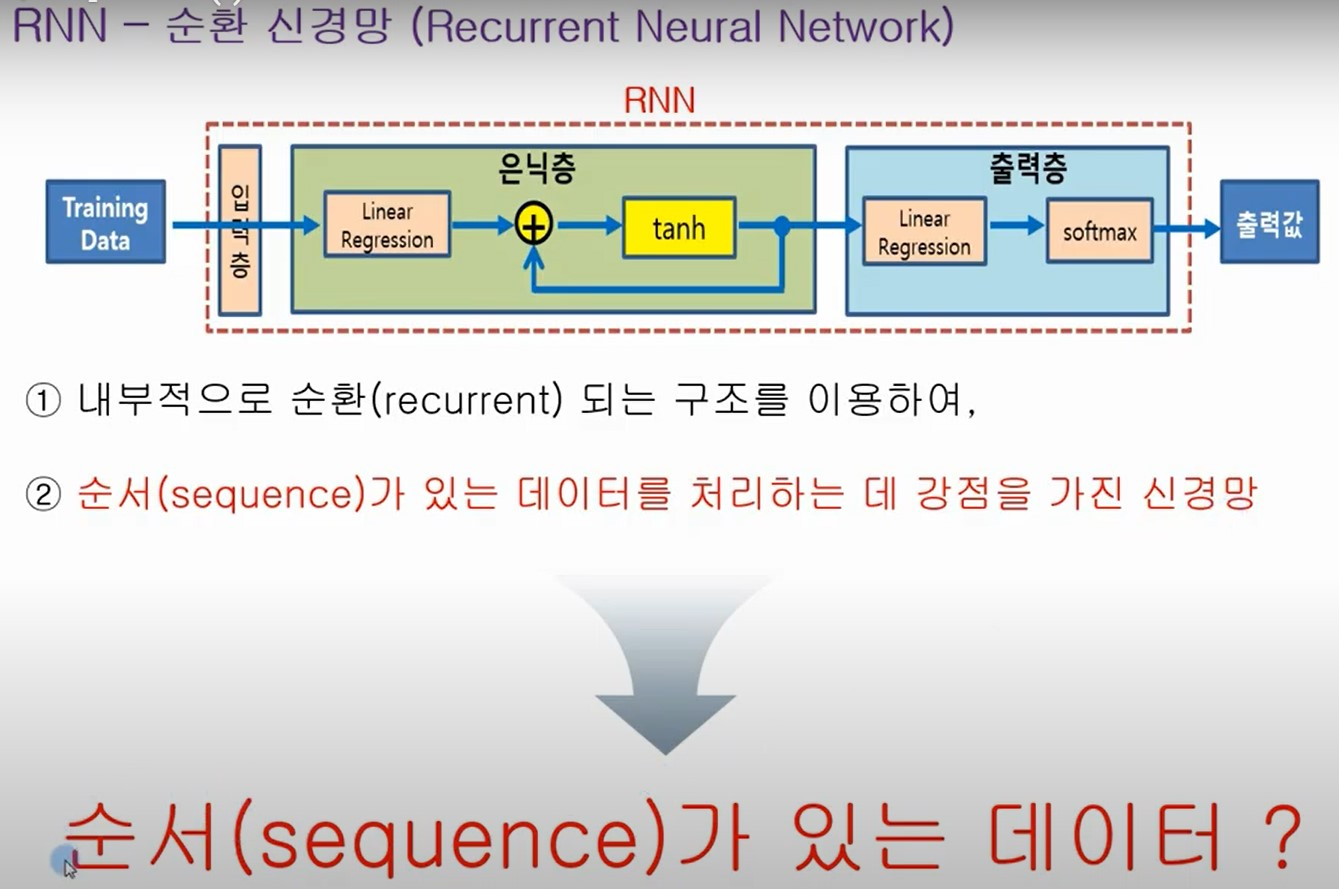

In [7]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/dl/rnn2.jpg')

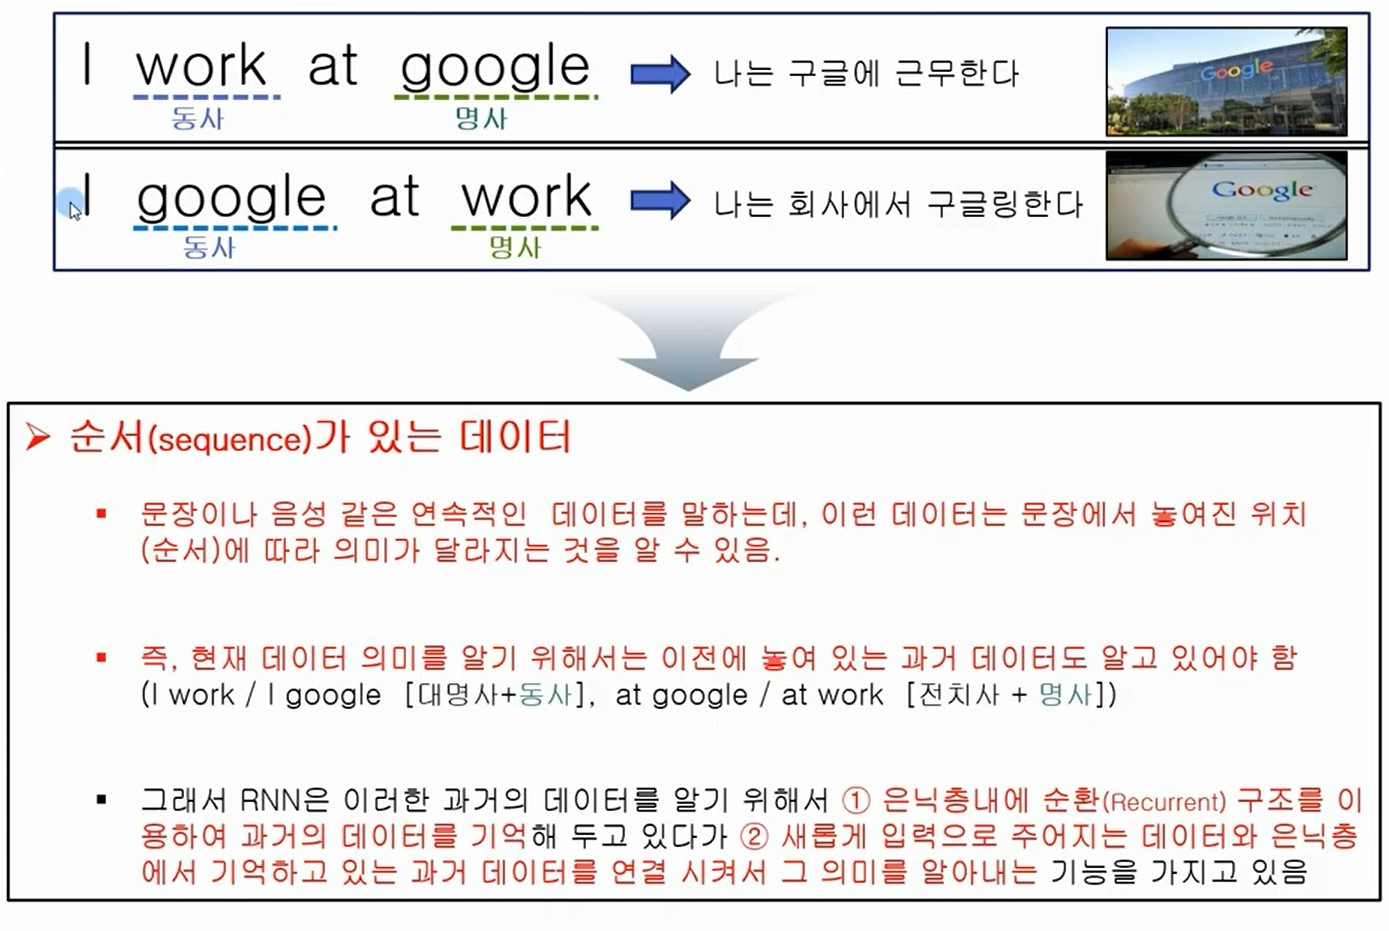

In [9]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/dl/rnn3.jpg')

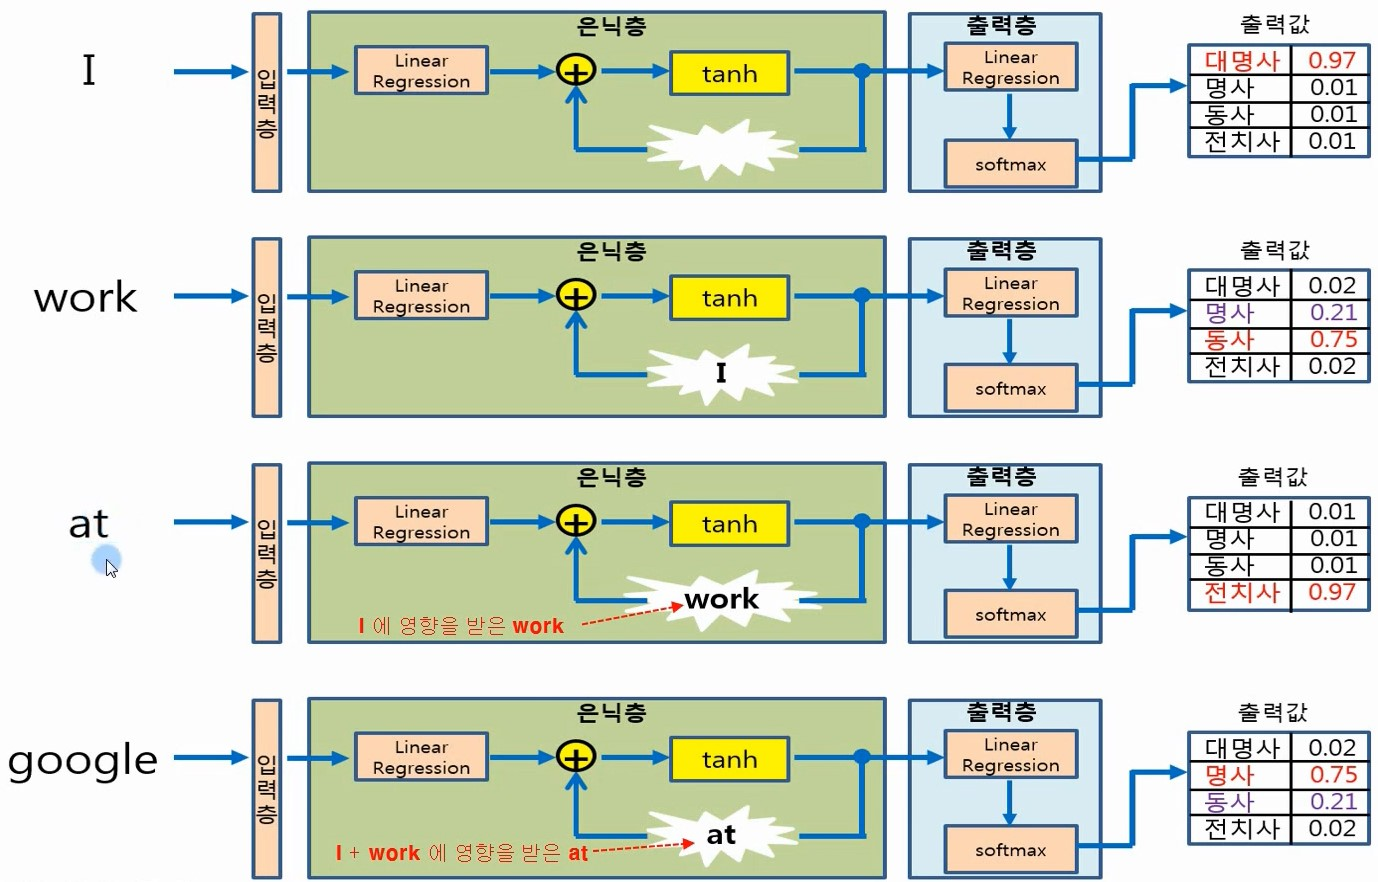

In [10]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/dl/rnn4.jpg')

In [11]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32)) # (batch_size, output_features)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [16]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True)) # (batch_size, timesteps, output_features)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [17]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True)) # (batch_size, timesteps, output_features)
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, None, 32)          2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [21]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(input_train.shape)
print(input_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩
(25000, 500)
(25000, 500)


In [22]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 28s 168ms/step - loss: 0.6112 - acc: 0.6442 - val_loss: 0.6787 - val_acc: 0.6524
Epoch 2/10
157/157 [==============================] - 25s 159ms/step - loss: 0.3818 - acc: 0.8377 - val_loss: 0.4161 - val_acc: 0.8158
Epoch 3/10
157/157 [==============================] - 26s 164ms/step - loss: 0.2964 - acc: 0.8791 - val_loss: 0.3844 - val_acc: 0.8402
Epoch 4/10
157/157 [==============================] - 24s 155ms/step - loss: 0.2310 - acc: 0.9107 - val_loss: 0.4011 - val_acc: 0.8578
Epoch 5/10
157/157 [==============================] - 24s 152ms/step - loss: 0.2036 - acc: 0.9219 - val_loss: 0.3914 - val_acc: 0.8552
Epoch 6/10
157/157 [==============================] - 23s 145ms/step - loss: 0.1456 - acc: 0.9466 - val_loss: 0.4165 - val_acc: 0.8598
Epoch 7/10
157/157 [==============================] - 21s 135ms/step - loss: 0.1096 - acc: 0.9623 - val_loss: 0.4399 - val_acc: 0.8490
Epoch 8/10
157/157 [==============================] - 2

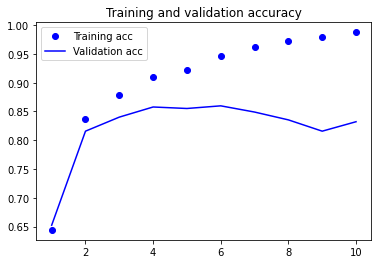

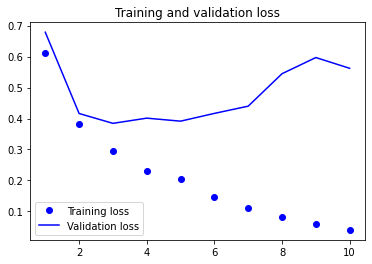

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

DNN 정확도 87% 대비 성능이 높지 않음
이유로는
- 전체 시퀀스가 아니라 500개 단어만 사용
- SimpleRNN은 이 경우와 같은 긴 시퀀스를 처리하는데는 적합하지 않음. 즉 더 잘 작동하는 고급 순환층을 고려할 필요가 있음

LSTM
- SimpleRNN은 긴 시간에 걸친 의존성은 학습할 수 없다.
- 그래디언트 소실 문제가 발생하기 때문이다.
-  LSTM(Long Short-Term Memory) 알고리즘은 정보를 여러 타임스텝에 걸처 나르는 방법을 추가하여 시퀀스 어느 지점에서 추출된 정보가 컨베이어 벨트 위로 올라가 필요한 시점의 타임스탭으로 이동하여 떨군다.
- 개념적으로 데이터를 실어 나르는 이 흐름이 다음 출력과 상태를 조절한다.

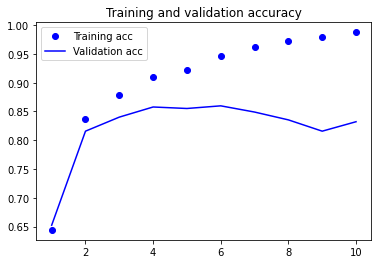

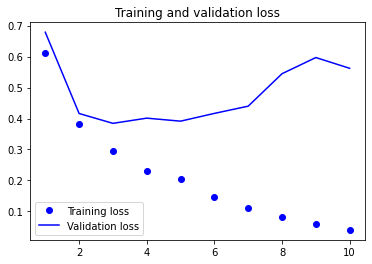

In [24]:
from tensorflow.keras.layers import LSTM

model = Sequential()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

LSTM 검증 정확도 88.9%
- SimpleRNN 보다 개선된 이유는 LSTM이 그래디언트 소실 문제로 부터 덜 영향을 받기 때문임
반면 아주 좋은 정확도를 보이지 않는 이유는
- 하이퍼파라미터 튜닝을 전혀 하지 않음
- LSTM은 감성분류 문제에 별 도움이 되지 않음. 왜냐하면 LSTM은 리뷰를 전체적으로 길게 분석하는 일에 적합하며 이런 간단한 문제는 단어
빈도 분석 등의 방법이 더 적합함. 즉 LSTM은 질문 응답, 기계 번역 분야에 더 적합하다고 할 수 있음